<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson04_RDKit/lecture_note_colab_py3Dmol_no5_3%E6%AC%A1%E5%85%83%E8%A1%A8%E7%A4%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#rdkitのインストール
!pip install rdkit
!pip install pubchempy

In [23]:
!pip install py3dmol

In [24]:
import py3Dmol
py3Dmol.__version__

'2.0.4'

In [2]:
import platform
# 使用しているOSを表示
platform.platform()

'Linux-5.15.120+-x86_64-with-glibc2.35'

In [3]:
# pythonのversionを表示
!python -V

Python 3.10.12


## pubchempyからの呼び出しと確認

In [52]:
import pubchempy as pcp
sdf = pcp.get_sdf('taxol', 'name')
print(sdf)

36314
  -OEChem-11182320112D

113119  0     1  0  0  0  0  0999 V2000
    5.1483   -5.7417    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.3178   -4.1322    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.0057   -3.2798    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.4821   -1.9332    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.4962   -3.0851    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.5446   -0.3023    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.8690   -1.9332    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.5875    0.4787    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.6038   -5.2924    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    8.4245   -2.2863    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.7693    0.9225    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.3628    1.7035    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    9.0017    1.8929    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    7.2593    5.0495

In [50]:
view = py3Dmol.view(data=sdf)
view.setStyle({'stick': {}})
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [46]:
from rdkit import rdBase, Chem
from rdkit.Chem import Descriptors, Draw
from rdkit.ML.Descriptors import MoleculeDescriptors
print(rdBase.rdkitVersion)

2023.09.1


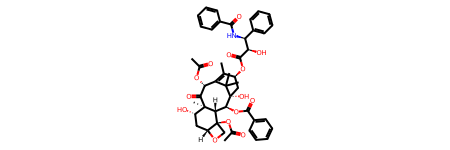

In [47]:
mol = Chem.MolFromMolBlock(sdf)
mol

[01:06:11] Molecule does not have explicit Hs. Consider calling AddHs()
[01:06:11] Molecule does not have explicit Hs. Consider calling AddHs()


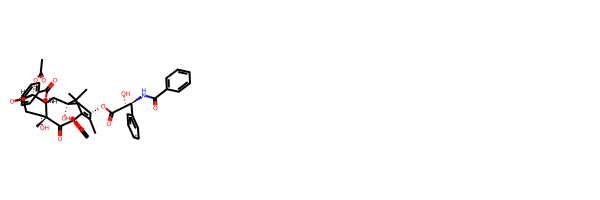

In [48]:
Chem.AddHs(mol, addCoords=True)
# 3次元構造の作成。
AllChem.EmbedMolecule(mol, AllChem.ETKDG())
# MMFFで最適化
AllChem.MMFFOptimizeMoleculeConfs(mol)
# 構造を書き出す
Draw.MolsToGridImage([mol])

In [53]:
sdf2 = Chem.MolToMolBlock(mol)
print(sdf2)

36314
     RDKit          3D

 62 68  0  0  1  0  0  0  0  0999 V2000
   -7.0408    0.3387   -1.4459 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.7403    2.4103   -1.0734 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7738    0.4617    1.4686 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9831   -1.3070    0.5844 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.0787   -2.2400   -3.8528 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2167   -2.4100   -3.0916 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3684   -3.3008   -1.5078 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.8683   -0.1330    1.2738 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.9507    2.4065   -3.2207 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8490    2.4095    2.2309 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1259   -1.3616   -4.9111 O   0  0  0  0  0  0  0  0  0  0  0  0
    2.4102   -1.8455    2.6951 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.8396    1.0922    2.8834 O   0  0  0  0  0  0  0  0  0  0  0  0
    6.9572   -0.3184

In [51]:
view = py3Dmol.view(data=sdf2)
view.setStyle({'stick': {}})
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol